In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import dython.nominal as dy
import warnings
import nfl_data_py as nfl
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Pull data from file

In [593]:
fullWRData = pd.read_csv('Data/WRDataSet.csv', usecols=['EarlyDeclare', 'FanScore', 'draft_team', 'draft_ovr', 'school', 'ht', 'wt', 'forty', 'vertical', 'NFLFanScore'])
fullWRData.head()

,EarlyDeclare,FanScore,draft_team,draft_ovr,school,ht,wt,forty,vertical,NFLFanScore
0,False,18.385714,San Francisco 49ers,213,Michigan State,72,206,4.56,30.5,3.180000
1,False,14.976923,New England Patriots,59,Marshall,75,210,4.37,35.0,4.953283
2,True,11.653846,Jacksonville Jaguars,101,South Carolina,67,173,4.58,32.0,5.601923
3,False,7.237500,Atlanta Falcons,184,Fresno State,69,181,4.44,37.5,5.683333
4,False,16.861538,New Orleans Saints,237,Michigan,75,203,4.55,36.0,8.725000


See how draft/combine data is correlated for WR

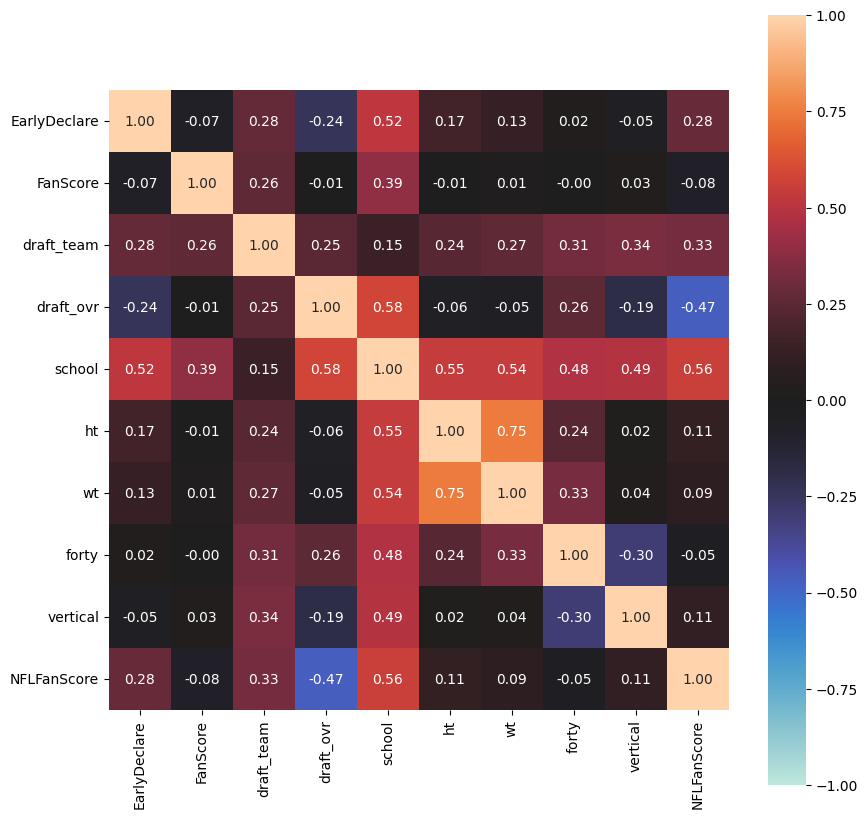

,EarlyDeclare,FanScore,draft_team,draft_ovr,school,ht,wt,forty,vertical,NFLFanScore
EarlyDeclare,1.00,-0.07,0.28,-0.24,0.52,0.17,0.13,0.02,-0.05,0.28
FanScore,-0.07,1.00,0.26,-0.01,0.39,-0.01,0.01,-0.00,0.03,-0.08
draft_team,0.28,0.26,1.00,0.25,0.15,0.24,0.27,0.31,0.34,0.33
draft_ovr,-0.24,-0.01,0.25,1.00,0.58,-0.06,-0.05,0.26,-0.19,-0.47
school,0.52,0.39,0.15,0.58,1.00,0.55,0.54,0.48,0.49,0.56
ht,0.17,-0.01,0.24,-0.06,0.55,1.00,0.75,0.24,0.02,0.11
wt,0.13,0.01,0.27,-0.05,0.54,0.75,1.00,0.33,0.04,0.09
forty,0.02,-0.00,0.31,0.26,0.48,0.24,0.33,1.00,-0.30,-0.05
vertical,-0.05,0.03,0.34,-0.19,0.49,0.02,0.04,-0.30,1.00,0.11
NFLFanScore,0.28,-0.08,0.33,-0.47,0.56,0.11,0.09,-0.05,0.11,1.00


In [595]:
complete_correlation = dy.associations(fullWRData, figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

Standardize Data

In [596]:
sc = StandardScaler()
sc.fit(fullWRData[['FanScore', 'draft_ovr', 'ht', 'wt', 'forty', 'vertical']])
fullWRData[['FanScore', 'draft_ovr', 'ht', 'wt', 'forty', 'vertical']] = sc.transform(fullWRData[['FanScore', 'draft_ovr', 'ht', 'wt', 'forty', 'vertical']])
fullWRData.head()

,EarlyDeclare,FanScore,draft_team,draft_ovr,school,ht,wt,forty,vertical,NFLFanScore
0,False,-0.085708,San Francisco 49ers,1.605934,Michigan State,-0.250502,0.278339,0.921737,-1.866152,3.180000
1,False,-0.116736,New England Patriots,-0.625518,Marshall,1.076832,0.547922,-1.062519,-0.320705,4.953283
2,True,-0.146983,Jacksonville Jaguars,-0.016940,South Carolina,-2.462725,-1.945727,1.130606,-1.351003,5.601923
3,False,-0.187182,Atlanta Falcons,1.185726,Fresno State,-1.577836,-1.406559,-0.331477,0.537876,5.683333
4,False,-0.099581,New Orleans Saints,1.953693,Michigan,1.076832,0.076151,0.817303,0.022727,8.725000


In [597]:
fullWRData["EarlyDeclare"] = LabelEncoder().fit_transform(fullWRData["EarlyDeclare"])
encodedWRData = pd.get_dummies(fullWRData, columns=['school', 'draft_team'])
encodedWRData.head()

,EarlyDeclare,FanScore,draft_ovr,ht,wt,forty,vertical,NFLFanScore,school_Ala-Birmingham,school_Alabama,...,draft_team_Pittsburgh Steelers,draft_team_San Diego Chargers,draft_team_San Francisco 49ers,draft_team_Seattle Seahawks,draft_team_St. Louis Rams,draft_team_Tampa Bay Buccaneers,draft_team_Tennessee Titans,draft_team_Washington Commanders,draft_team_Washington Football Team,draft_team_Washington Redskins
0,0,-0.085708,1.605934,-0.250502,0.278339,0.921737,-1.866152,3.180000,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,-0.116736,-0.625518,1.076832,0.547922,-1.062519,-0.320705,4.953283,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.146983,-0.016940,-2.462725,-1.945727,1.130606,-1.351003,5.601923,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.187182,1.185726,-1.577836,-1.406559,-0.331477,0.537876,5.683333,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.099581,1.953693,1.076832,0.076151,0.817303,0.022727,8.725000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [598]:
x = encodedWRData.drop(columns='NFLFanScore')
y = encodedWRData['NFLFanScore']

model = LinearRegression()

model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.5533466836575454


**Make Predictions**

In [635]:
rookiesWR23 = pd.read_csv('Data/RookieWR_2023.csv', usecols=['EarlyDeclare', 'FanScore', 'draft_team', 'draft_ovr', 'school', 'ht', 'wt', 'forty', 'vertical', 'player_name'])
rookiesWR23.head()

,EarlyDeclare,FanScore,draft_team,draft_ovr,player_name,school,ht,wt,forty,vertical
0,False,17.216667,Detroit Lions,219,Antoine Green,North Carolina,74,199,4.47,33.5
1,False,21.169231,New Orleans Saints,195,A.T. Perry,Wake Forest,76,198,4.47,35.0
2,False,20.395833,Cleveland Browns,74,Cedric Tillman,Tennessee,75,213,4.54,37.0
3,False,24.396154,Cincinnati Bengals,131,Charlie Jones,Purdue,71,175,4.43,36.5
4,False,9.914286,Los Angeles Chargers,125,Derius Davis,TCU,68,165,4.36,36.0


In [636]:
rookiesWR23[['FanScore', 'draft_ovr', 'ht', 'wt', 'forty', 'vertical']] = sc.transform(rookiesWR23[['FanScore', 'draft_ovr', 'ht', 'wt', 'forty', 'vertical']])
rookiesWR23.head()

,EarlyDeclare,FanScore,draft_team,draft_ovr,player_name,school,ht,wt,forty,vertical
0,False,-0.096349,Detroit Lions,1.692874,Antoine Green,North Carolina,0.634388,-0.193433,-0.018174,-0.835854
1,False,-0.060371,New Orleans Saints,1.345115,A.T. Perry,Wake Forest,1.519277,-0.260829,-0.018174,-0.320705
2,False,-0.067411,Cleveland Browns,-0.408169,Cedric Tillman,Tennessee,1.076832,0.750110,0.712868,0.366160
3,False,-0.030999,Cincinnati Bengals,0.417758,Charlie Jones,Purdue,-0.692946,-1.810935,-0.435912,0.194443
4,False,-0.162817,Los Angeles Chargers,0.330818,Derius Davis,TCU,-2.020281,-2.484894,-1.166953,0.022727


In [637]:
rookiesWR23["EarlyDeclare"] = LabelEncoder().fit_transform(rookiesWR23["EarlyDeclare"])
encodedRookieWRData = pd.get_dummies(rookiesWR23, columns=['school', 'draft_team'])
encodedRookieWRData = encodedRookieWRData.reindex(columns = encodedWRData.columns, fill_value=0)
encodedRookieWRData = encodedRookieWRData.drop(columns='NFLFanScore')
encodedRookieWRData.head()

,EarlyDeclare,FanScore,draft_ovr,ht,wt,forty,vertical,school_Ala-Birmingham,school_Alabama,school_Arizona,...,draft_team_Pittsburgh Steelers,draft_team_San Diego Chargers,draft_team_San Francisco 49ers,draft_team_Seattle Seahawks,draft_team_St. Louis Rams,draft_team_Tampa Bay Buccaneers,draft_team_Tennessee Titans,draft_team_Washington Commanders,draft_team_Washington Football Team,draft_team_Washington Redskins
0,0,-0.096349,1.692874,0.634388,-0.193433,-0.018174,-0.835854,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.060371,1.345115,1.519277,-0.260829,-0.018174,-0.320705,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.067411,-0.408169,1.076832,0.750110,0.712868,0.366160,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.030999,0.417758,-0.692946,-1.810935,-0.435912,0.194443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.162817,0.330818,-2.020281,-2.484894,-1.166953,0.022727,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [639]:
rookiesWR23['PredNFLFanScore'] = model.predict(encodedRookieWRData)

In [640]:
rookiesWR23.sort_values(by=['PredNFLFanScore'], ascending=False)

,EarlyDeclare,FanScore,draft_team,draft_ovr,player_name,school,ht,wt,forty,vertical,PredNFLFanScore
28,0,-0.045945,Baltimore Ravens,-1.161647,Zay Flowers,Boston Col.,-1.577836,-1.339164,-0.540346,-0.148989,3.147798e+11
27,1,-0.054971,Houston Texans,1.490015,Xavier Hutchinson,Iowa St.,0.634388,0.076151,0.608433,0.022727,3.147798e+11
22,0,-0.020079,Kansas City Chiefs,-0.683478,Rashee Rice,SMU,0.191943,0.143547,0.399564,1.739890,1.242432e+01
9,1,-0.050184,Seattle Seahawks,-1.190627,Jaxon Smith-Njigba,Ohio St.,0.191943,-0.395621,0.503999,-0.320705,1.199756e+01
18,1,-0.005687,Houston Texans,-0.480619,Nathaniel Dell,Houston,-2.020281,-2.484894,0.190695,0.022727,1.150830e+01
21,1,-0.121304,Los Angeles Chargers,-1.176137,Quentin Johnston,TCU,1.076832,0.413130,0.190695,1.568173,1.121582e+01
10,0,-0.098916,Green Bay Packers,-0.755928,Jayden Reed,Michigan St.,-0.692946,-1.002184,-0.227043,-0.835854,1.106543e+01
16,1,-0.129829,Denver Broncos,-0.567559,Marvin Mims,Oklahoma,-0.692946,-1.271768,-0.958084,1.224741,1.035303e+01
12,1,-0.032622,Minnesota Vikings,-1.147157,Jordan Addison,USC,-0.692946,-1.945727,0.190695,-0.664138,1.014355e+01
11,0,-0.143552,Carolina Panthers,-0.915317,Jonathan Mingo,Mississippi,0.634388,1.221881,-0.122608,1.224741,1.004150e+01


# Future Stats To Consider

Number of teammates drafted

Team target share

Breakout age